#  1. Importing Packages

In [143]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Understanding the Dataset

In [144]:
#Reading the dataset
df = pd.read_csv(r"D:\Lead Scoring Assignment\Leads.csv")

In [145]:
#Reading first few rows of the dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [146]:
#Shape of the Dataset
df.shape

(9240, 37)

##### Note: You can see there are a lot of column which have high number of missing values.These columns are not useful. Since, there are 9000 datapoints in our dataframe, let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [147]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 3. Cleaning the data

In [148]:
# Converting 'Select' values in the data set as null 
df= df.replace('Select', np.nan)

In [149]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [150]:
# Dropping unique valued columns
df2= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [151]:
# Checking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [152]:
# Removing all the columns that are no required and have 35% null values
df3 = df2.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df3.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [153]:
#Checking for null values again
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

As you can see from the above values , there are a large number of null variables in 4 columns. But eliminating the rows with the null value will cost us a lot of data and these are critical columns. Therefore, we are going to substitute "not provided" for the NaN values. In this manner, we have nearly no null values and all the data. If these are included in the model, it will be useless and we can discard it at that point.


In [154]:
df3['Specialization'] = df3['Specialization'].fillna('not provided') 
df3['What matters most to you in choosing a course'] = df3['What matters most to you in choosing a course'].fillna('not provided')
df3['Country'] = df3['Country'].fillna('not provided')
df3['What is your current occupation'] = df3['What is your current occupation'].fillna('not provided')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [155]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [156]:
df3["Country"].value_counts()

India                   6492
not provided            2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [157]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df3['Country'] = df3.apply(lambda x:slots(x['Country']), axis = 1)
df3['Country'].value_counts()

outside india    6779
not provided     2461
Name: Country, dtype: int64

In [158]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [159]:
# Checking the percentage of loss if the null values are removed
round(100*(sum(df3.isnull().sum(axis=1) > 1)/df3.shape[0]),2)

1.48

In [160]:
df4 = df3[df3.isnull().sum(axis=1) <1]

In [161]:
#for checking number of rows left in percent
round(100*(df4.shape[0])/(df.shape[0]),2)

98.2

In [162]:
# Rechecking the percentage of missing values
round(100*(df4.isnull().sum()/len(df4.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [163]:
#To see all categorical columns in detail
for column in df4:
    print(df4[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      12

In [165]:
# Removing Id values since they have unique values.
df_full = df4.drop('Prospect ID',1)
df_full.shape

(9074, 21)

# 4. Exploratory Data Analysis


### Univariate Analysis


#### 1. Categorical Variables

In [166]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

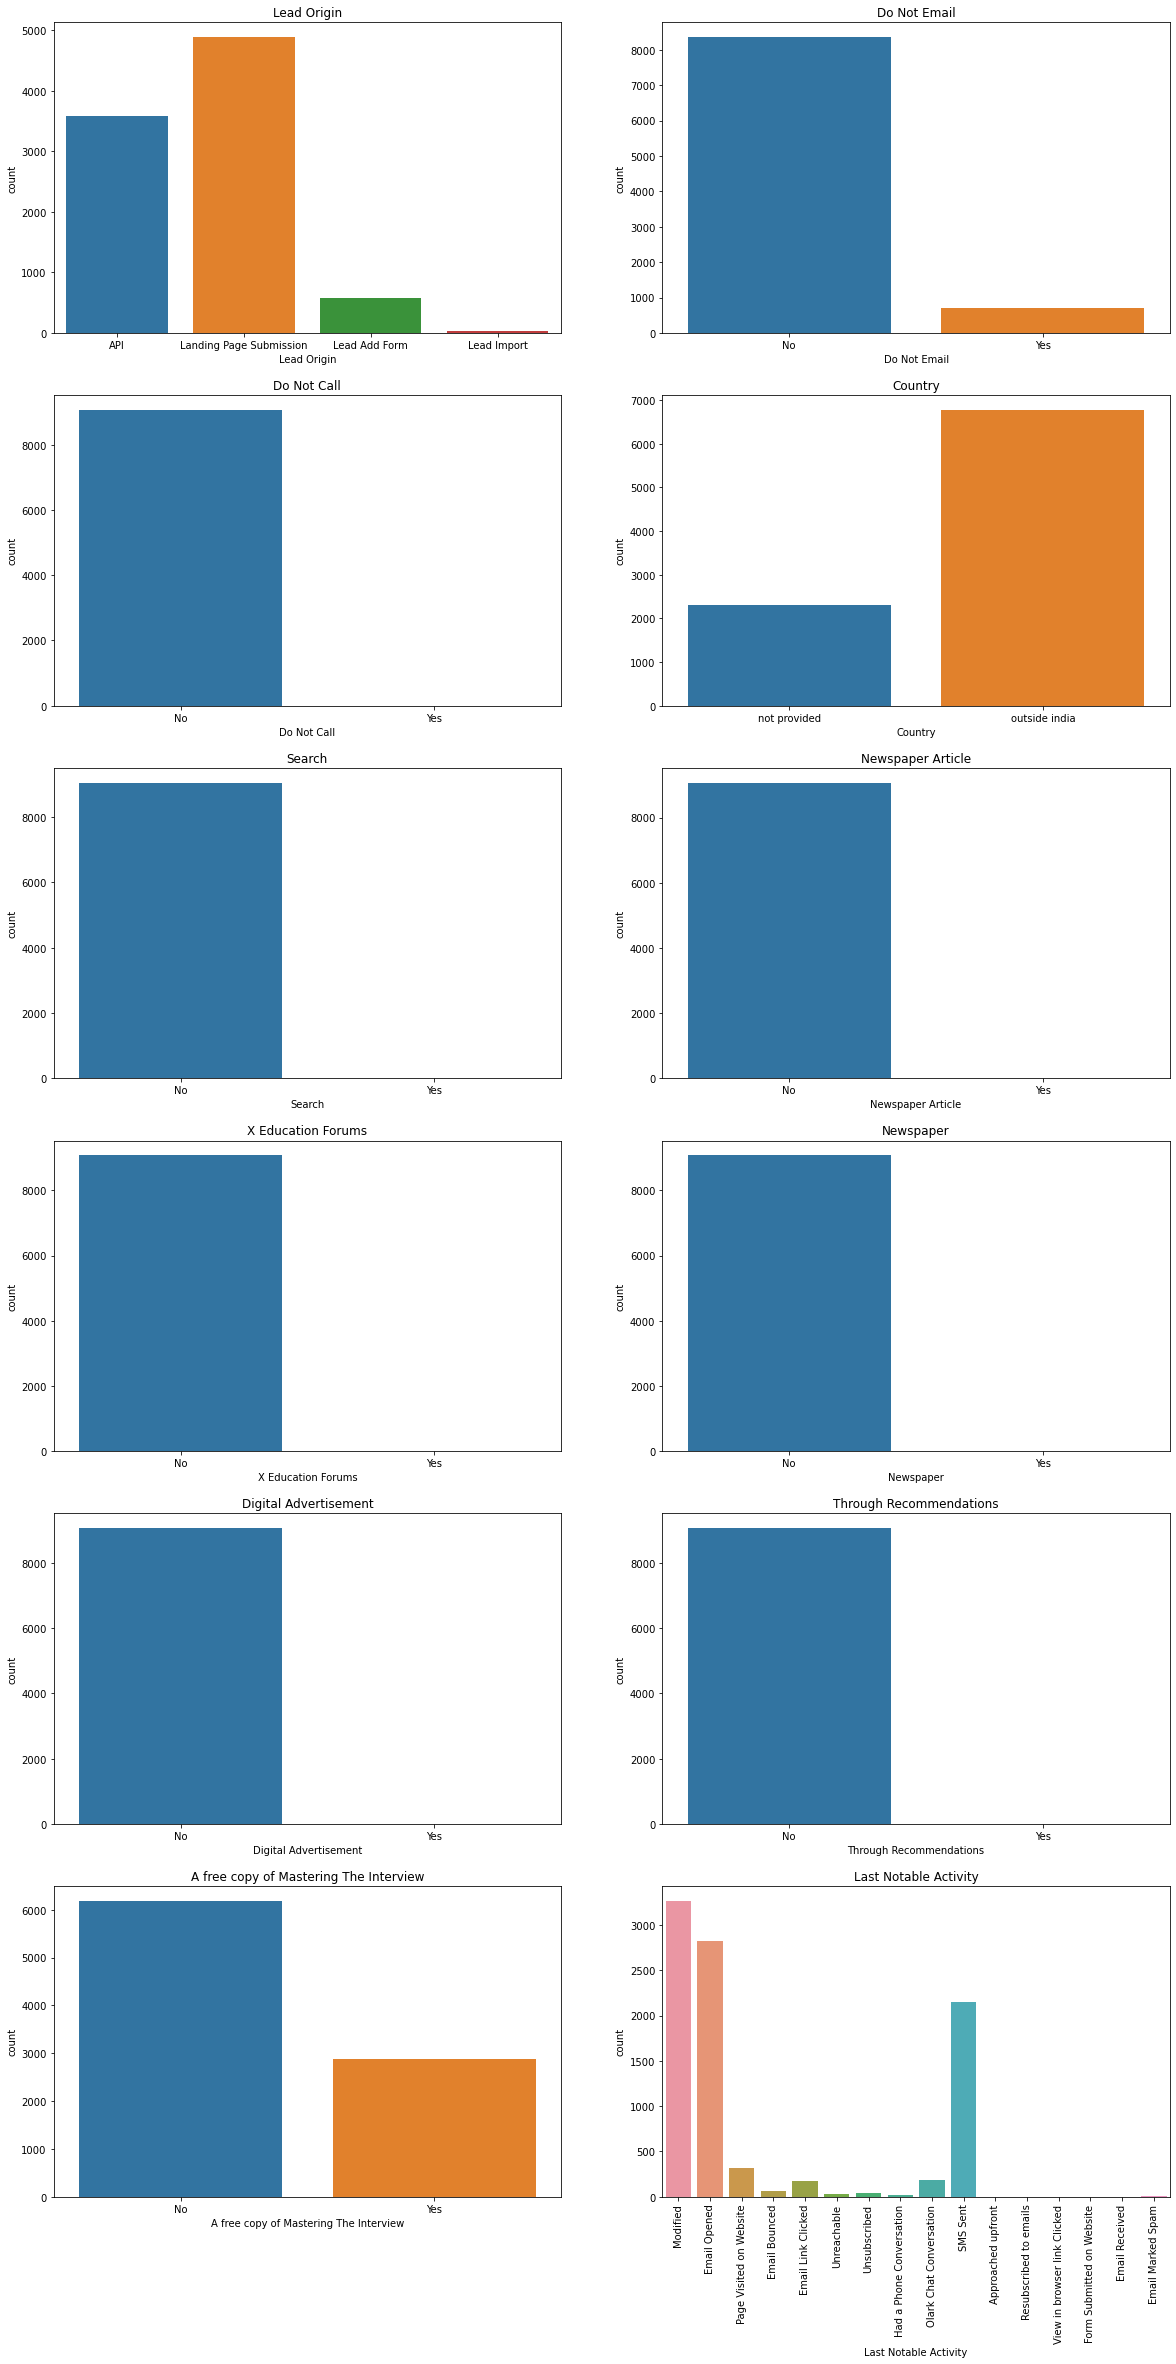

In [168]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(df_full['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_full['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_full['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_full['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_full['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_full['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_full['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_full['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_full['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_full['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_full['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_full['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

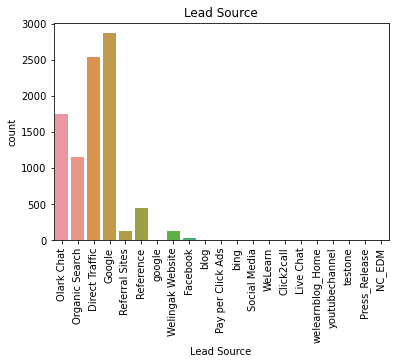

In [169]:
sns.countplot(df_full['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

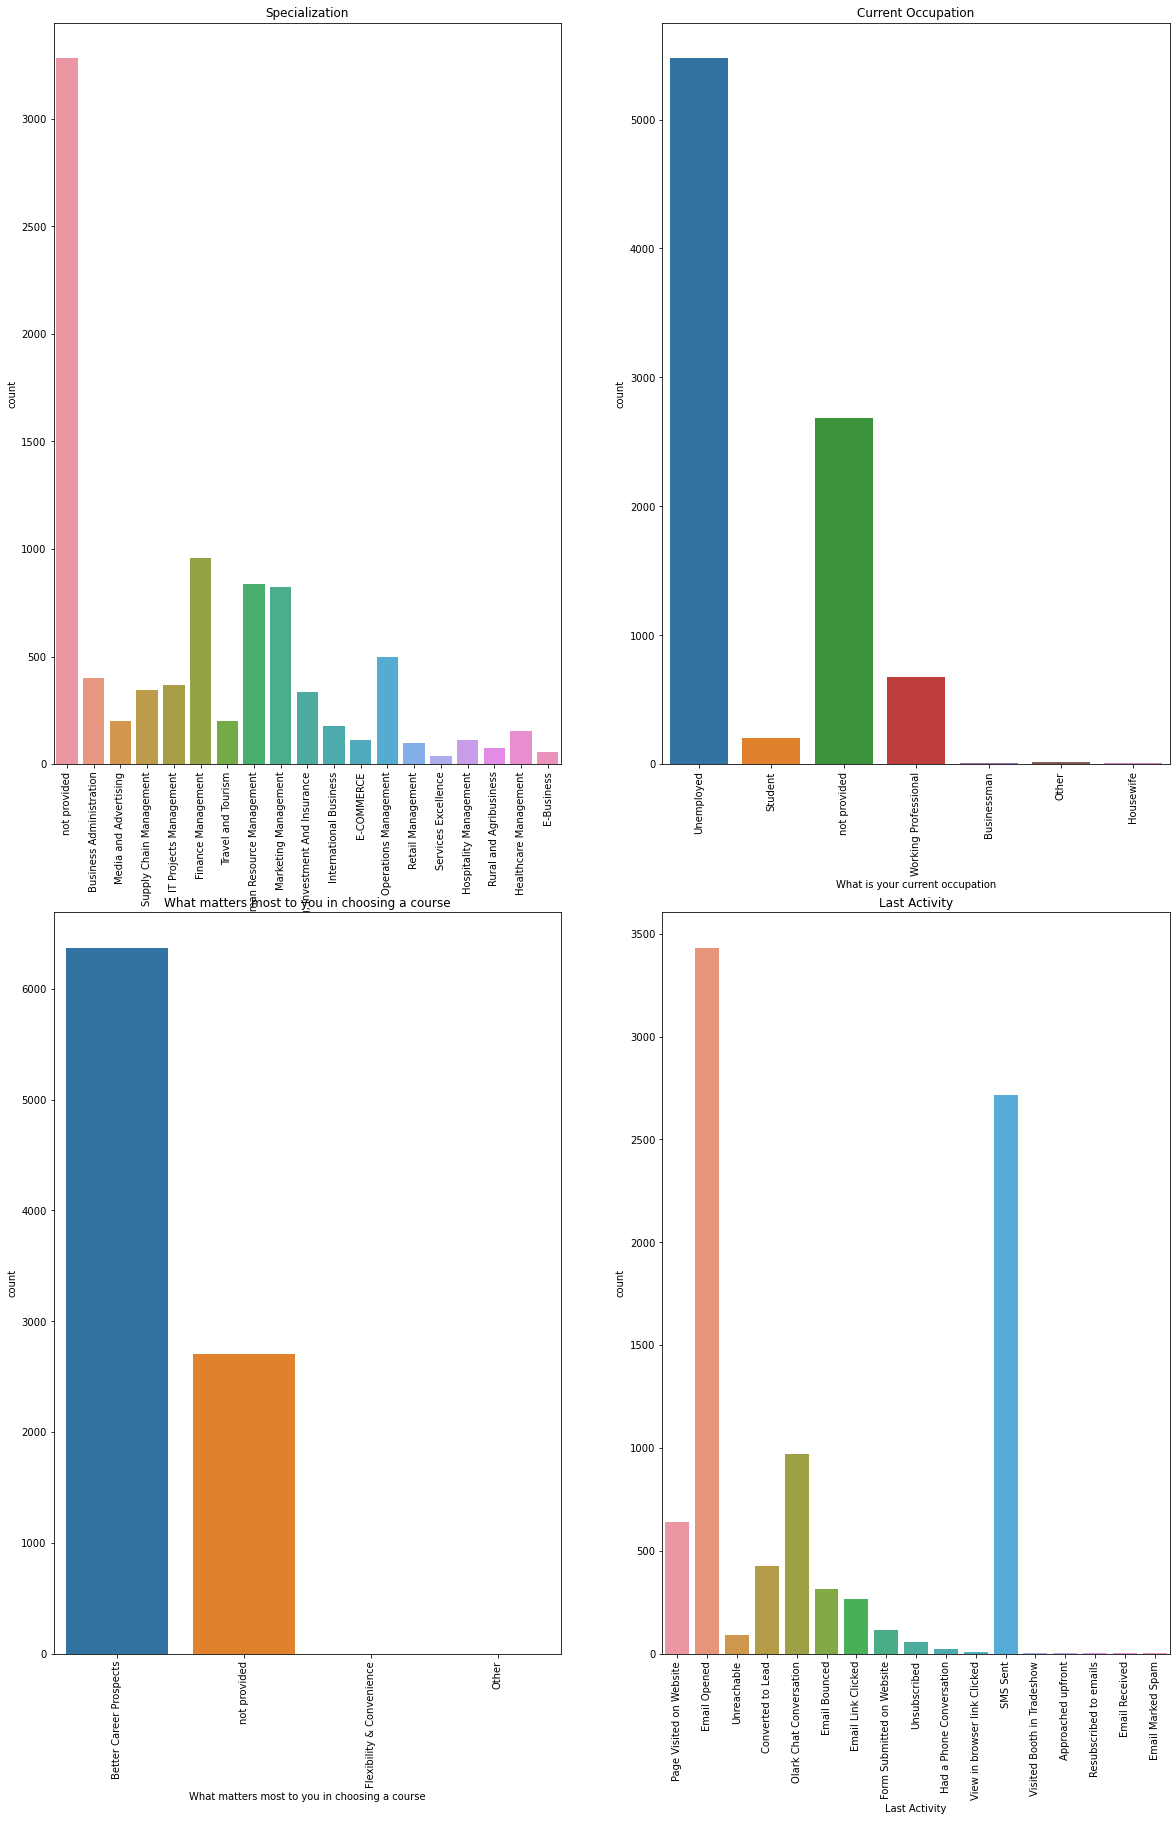

In [170]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(df_full['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_full['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_full['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_full['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

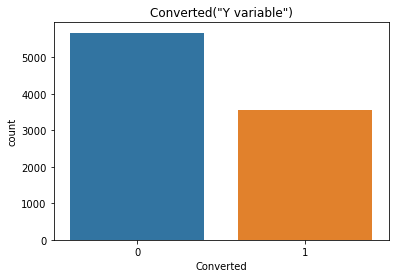

In [173]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2. Numerical variables

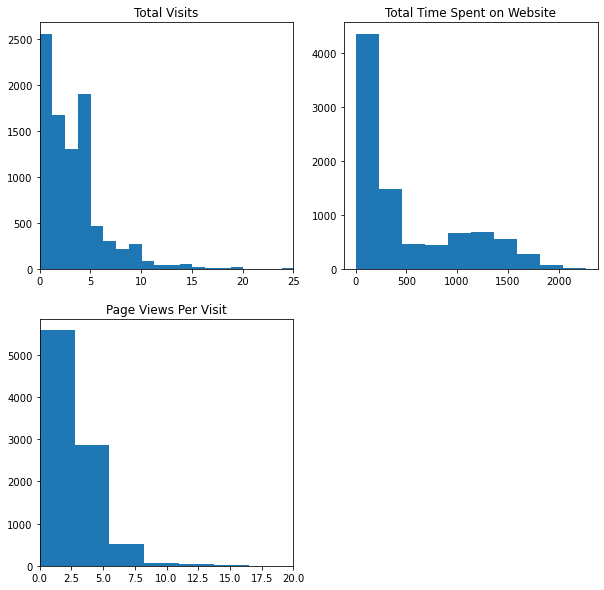

In [172]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_full['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_full['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_full['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

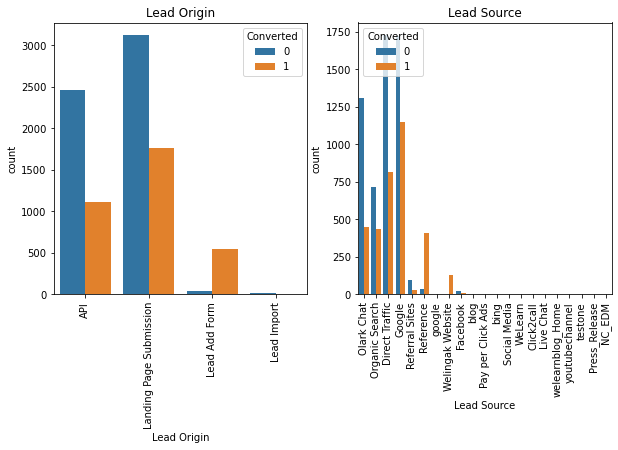

In [174]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

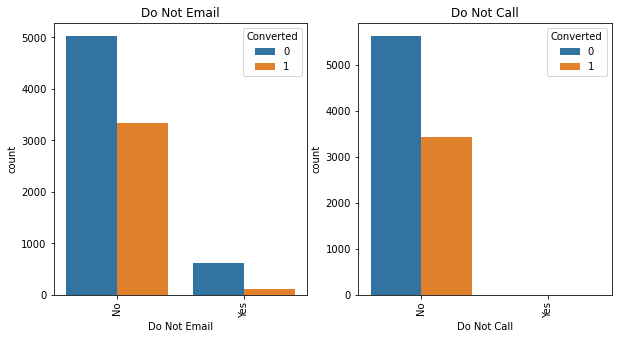

In [175]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

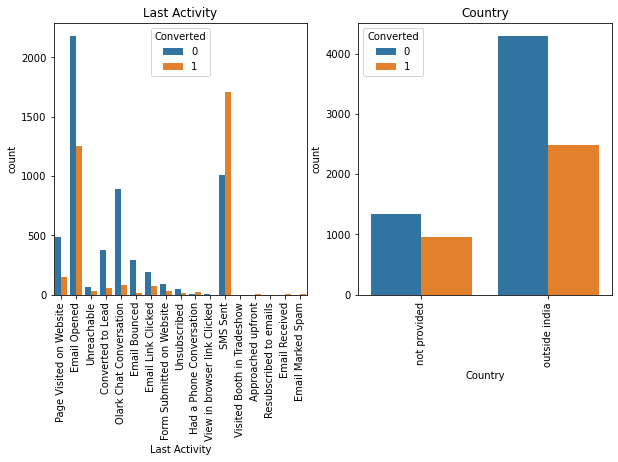

In [176]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

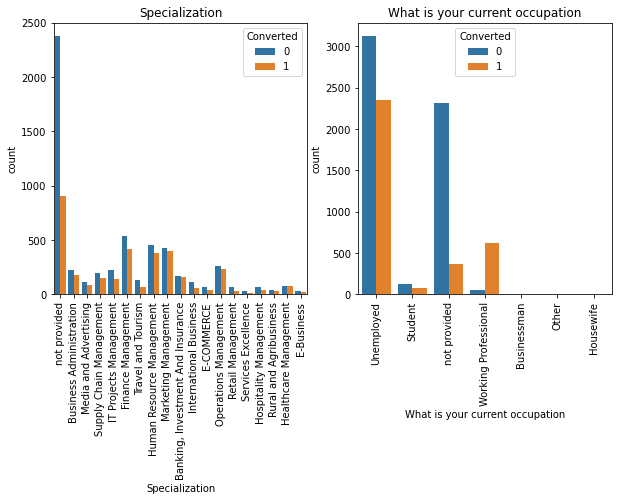

In [177]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

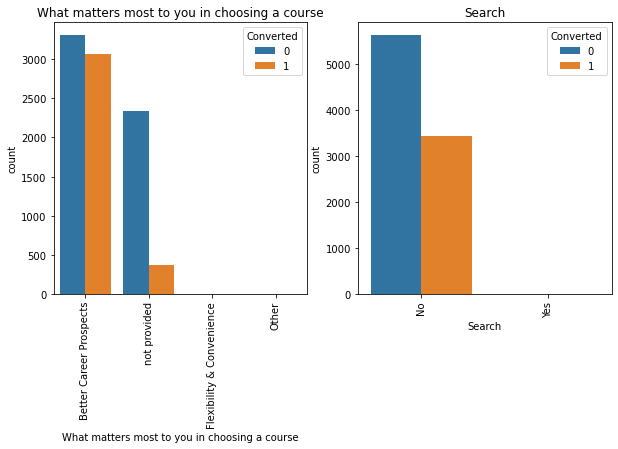

In [178]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

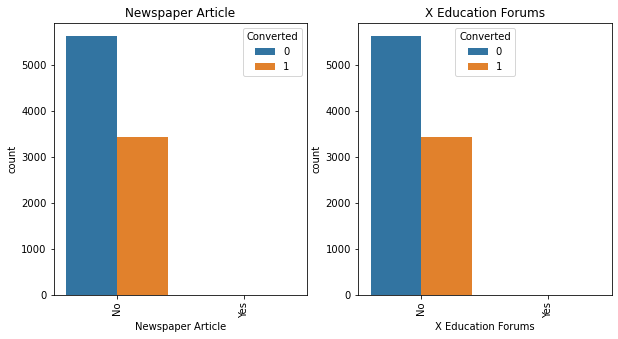

In [179]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

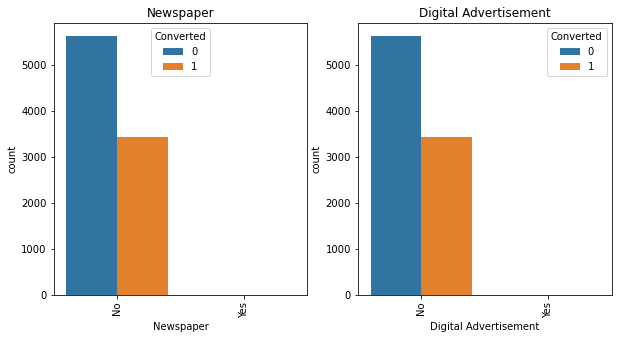

In [180]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

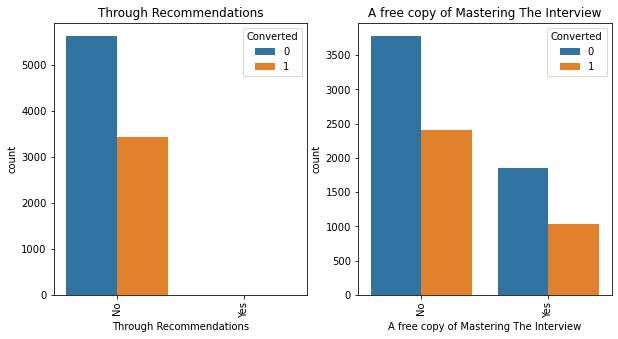

In [181]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

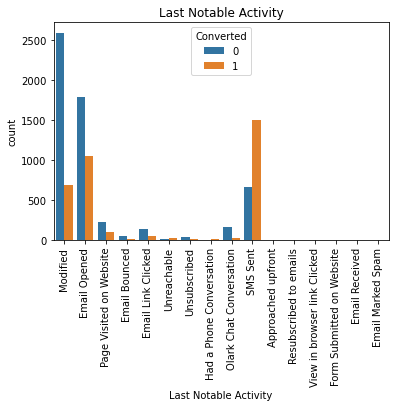

In [182]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= df_full).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

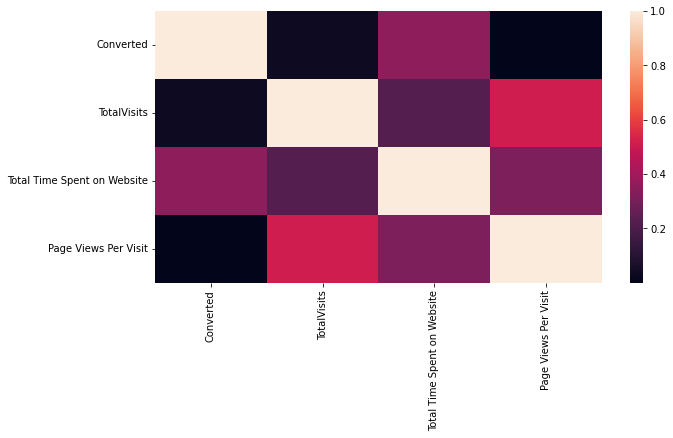

In [183]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(df_full.corr())
plt.show()

# 5. Dummy Variables


In [184]:
df_full.loc[:, df_full.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [185]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_full[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
df_full_dum = pd.concat([df_full, dummy], axis=1)
df_full_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,outside india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,outside india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,outside india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,outside india,...,0,0,0,0,0,0,0,0,0,0
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,outside india,...,0,0,0,0,0,0,1,0,0,0


In [186]:
df_full_dum = df_full_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
df_full_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# 6.Test and Train Split


In [187]:
# Import the library
from sklearn.model_selection import train_test_split

In [188]:
X = df_full_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [189]:
# Putting the target variable in y
y = df_full_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [190]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [191]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


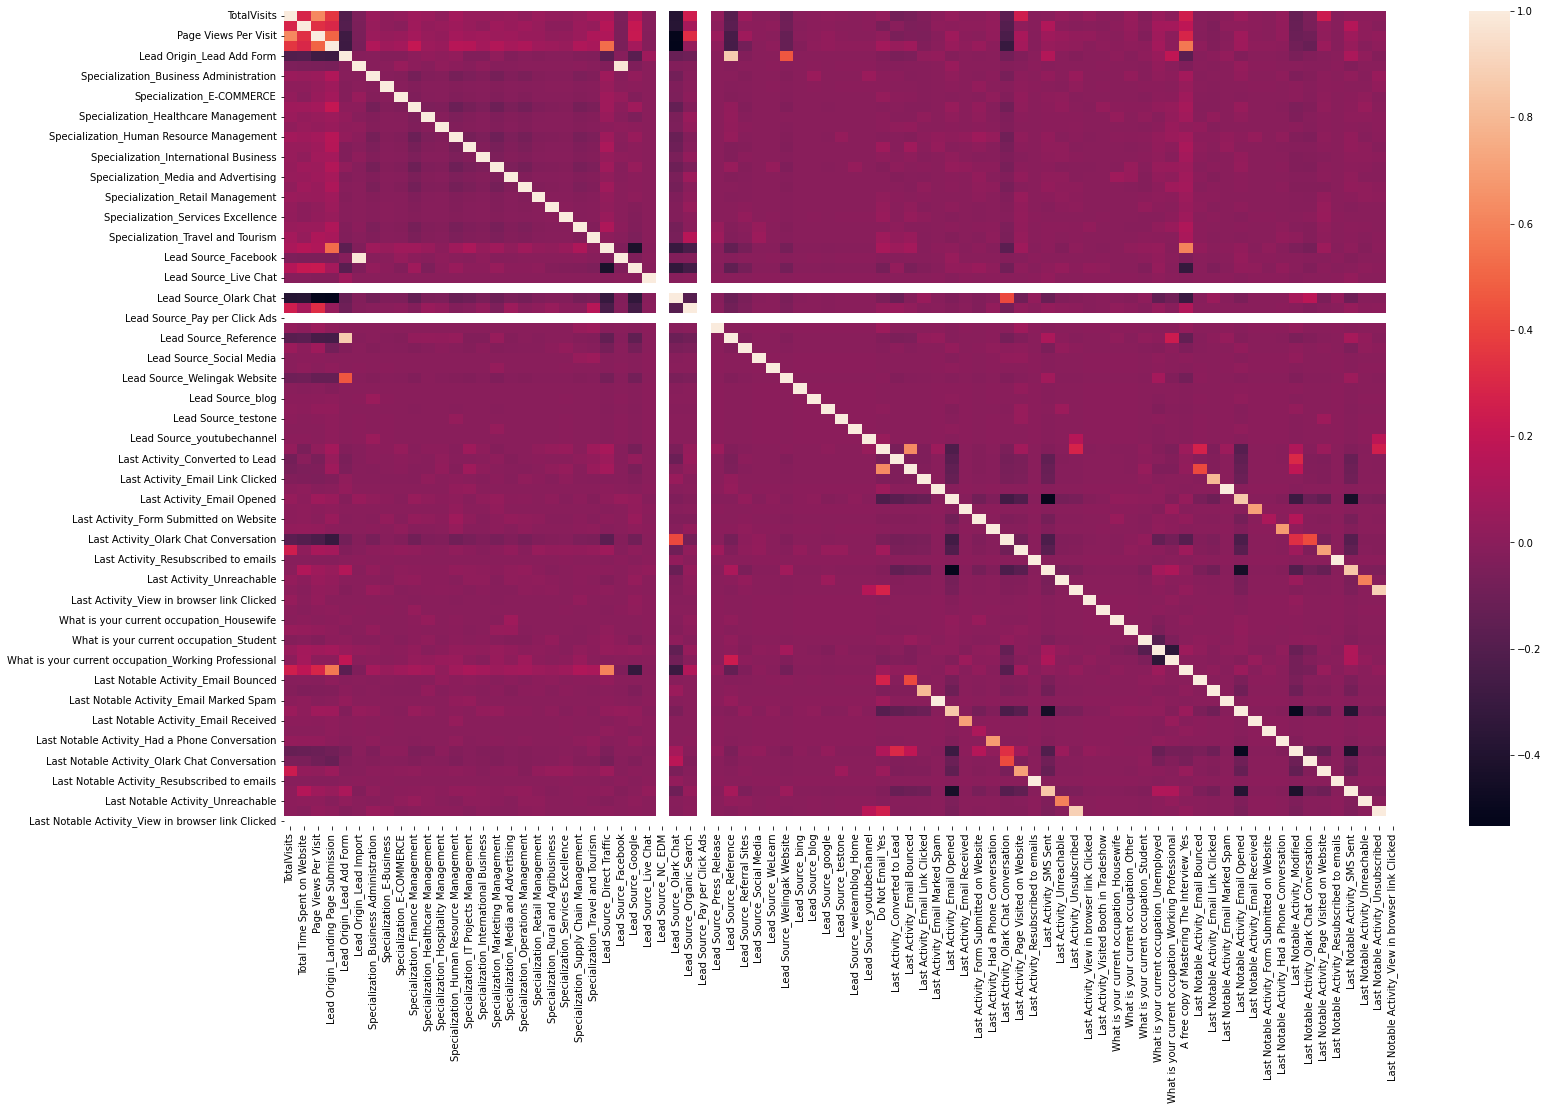

In [193]:
# To check the correlation among varibles
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr())
plt.show()

# 7.Model Building

In [194]:
#Importing required model 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [195]:
# Importing RFE
from sklearn.feature_selection import RFE

In [196]:
# Running RFE with 15 variables as output
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [197]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 32),
 ('Specialization_E-COMMERCE', False, 23),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 45),
 ('Specialization_Human Resource Management', False, 31),
 ('Specialization_IT Projects Management', False, 28),
 ('Specialization_International Business', False, 38),
 ('Specialization_Marketing Management', False, 22),
 ('Specialization_Media and Advertising', False, 44),
 ('Specialization_Operations Management', False, 27),
 ('Specialization_Retail Management', False, 64),
 ('Specialization_Rural and Agribusiness', False, 24),
 ('Specialization_Serv

In [198]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [199]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [200]:
# Importing statsmodels
import statsmodels.api as sm

In [204]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Mon, 12 Sep 2022   Deviance:                       5270.1
Time:                        10:26:17   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_Lead Add Form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_Olark Chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_Welingak Website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_Olark Chat Conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_SMS Sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_Housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_Other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_Student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_Unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_Working Professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_Had a Phone Conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_Unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [205]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [208]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


The VIF values seem fine but the p-values aren't. Dropping 'Last Notable Activity had a phone conversation' as it has a high p-value


In [210]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [211]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Mon, 12 Sep 2022   Deviance:                       5285.6
Time:                        10:32:36   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_Lead Add Form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_Olark Chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_Welingak Website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_Yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_Olark Chat Conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_SMS Sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_Housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_Other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_Student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_Unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_Working Professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_Unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [212]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
12,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


The VIF values seem fine but the p-values aren't. Dropping 'What is your current occupation_Housewife	' as it has a high p-value

In [213]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [214]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Mon, 12 Sep 2022   Deviance:                       5302.6
Time:                        10:34:42   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_Lead Add Form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_Olark Chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_Welingak Website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_Yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_Olark Chat Conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_SMS Sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_Other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_Student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_Unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_Unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [215]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_Lead Add Form,1.58
7,Last Activity_SMS Sent,1.53
3,Lead Source_Olark Chat,1.51
6,Last Activity_Olark Chat Conversation,1.37
11,What is your current occupation_Working Profes...,1.32
4,Lead Source_Welingak Website,1.31
5,Do Not Email_Yes,1.06


All the VIF values are good and all the p-values are also good. So we can fix model.

# 8.Making Predictions

In [216]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647883
3604    0.133180
5584    0.232946
7679    0.133180
7563    0.495090
7978    0.777765
7780    0.167311
7863    0.982741
838     0.772980
708     0.149249
dtype: float64

In [217]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64788325, 0.13318019, 0.23294642, 0.13318019, 0.49508996,
       0.77776483, 0.16731088, 0.98274125, 0.77298038, 0.1492489 ])

In [218]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647883
1,0,0.133180
2,0,0.232946
3,0,0.133180
4,0,0.495090


In [219]:
# Replacing 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647883,1
1,0,0.133180,0
2,0,0.232946,0
3,0,0.133180,0
4,0,0.495090,0


# 9.Model Evaluation

In [220]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [222]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [223]:
# Predicted     not_churn    churn
# Actual
# not_churn        3437       458
# churn             747      1709

In [224]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.810266099826799

Its 81% accuracy which is very good

In [225]:
# Replacing the value of true positive
TP = confusion[1,1]
# Replacing the value of true negatives
TN = confusion[0,0]
# Replacing the value of false positives
FP = confusion[0,1] 
# Replacing the value of false negatives
FN = confusion[1,0]

In [226]:
# Calculating the sensitivity
TP/(TP+FN)

0.6958469055374593

In [227]:
# Calculating the specificity
TN/(TN+FP)

0.8824133504492939

The current cut-off of 0.5 has 81% accuracy with sensitivity of around 70% and specificity of around 88%

# 10.Finding the Optimal Cutoff

In [228]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [229]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

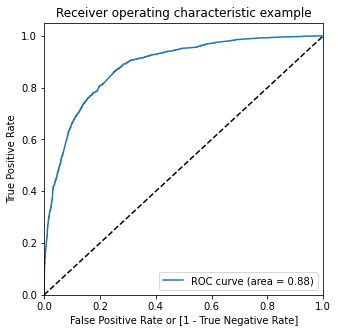

In [230]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value

In [231]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0


In [233]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.577232,0.983306,0.321181
0.2,0.2,0.758306,0.912866,0.660847
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809321,0.765879,0.836714
0.5,0.5,0.810266,0.695847,0.882413
0.6,0.6,0.802708,0.627850,0.912965
0.7,0.7,0.773579,0.504072,0.943517
0.8,0.8,0.753582,0.413681,0.967908
0.9,0.9,0.706660,0.260179,0.988190


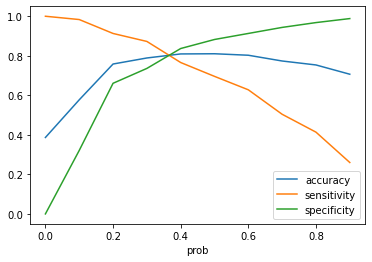

In [234]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the above graph we can draw that the optimal cut-off is 0.35

In [235]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [236]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8031806014800819

In [237]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3127,  768],
       [ 482, 1974]], dtype=int64)

In [238]:
# Replacing the value of true positive
TP = confusion2[1,1]
# Replacing the value of true negatives
TN = confusion2[0,0]
# Replacing the value of false positives
FP = confusion2[0,1] 
# Replacing the value of false negatives
FN = confusion2[1,0]

In [239]:
# Calculating the sensitivity
TP/(TP+FN)

0.8037459283387622

In [240]:
# Calculating the specificity
TN/(TN+FP)

0.8028241335044929

With the cut-off as 0.35 , We can see that accuracy , sensitivity and specificity all have around 80%

# 11. Making Predictions of Test Set

In [241]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [243]:
# Replacing all the columns in the final train model
col = X_train.columns

In [244]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,1,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,0,1,0,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,0,1,0,0,1,0,0


In [245]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [246]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,1
2720,0,0.133180,0
2721,1,0.820744,1


In [247]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8079324274697025

In [248]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1404,  340],
       [ 183,  796]], dtype=int64)

In [250]:
# Replacing the value of true positive
TP = confusion2[1,1]
# Replacing the value of true negatives
TN = confusion2[0,0]
# Replacing the value of false positives
FP = confusion2[0,1] 
# Replacing the value of false negatives
FN = confusion2[1,0]

In [251]:
# Calculating the sensitivity
TP/(TP+FN)

0.8130745658835546

In [252]:
# Calculating the specificity
TN/(TN+FP)

0.805045871559633

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%

# 12.Precision Recall View

In [253]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3437,  458],
       [ 747, 1709]], dtype=int64)

In [254]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7886479003230272

In [255]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

The optimal cut-off of 0.35 has 78% precision and recall of around 70%

### Precision and recall tradeoff

In [257]:
from sklearn.metrics import precision_recall_curve


In [258]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [259]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

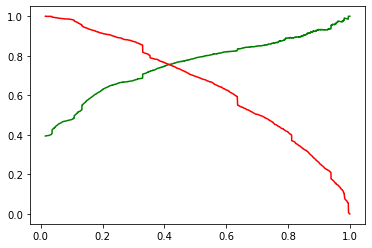

In [260]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [267]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647883,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.232946,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.133180,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.495090,0,1,1,1,1,1,0,0,0,0,0,1


In [268]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8093213667139033

In [269]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3259,  636],
       [ 575, 1881]], dtype=int64)

In [270]:
# Replacing the value of true positive
TP = confusion2[1,1]
# Replacing the value of true negatives
TN = confusion2[0,0]
# Replacing the value of false positives
FP = confusion2[0,1] 
# Replacing the value of false negatives
FN = confusion2[1,0]

In [271]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7473182359952324

In [272]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7658794788273615

The cut-off of 0.40 has 74% precision and recall of around 76%

# 13. Making Predictions on the Test Set

In [273]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456551
1,1,0.839834
2,1,0.982741
3,1,0.878240
4,0,0.108266


In [280]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.40 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456551,1
1,1,0.839834,1
2,1,0.982741,1
3,1,0.878240,1
4,0,0.108266,0
...,...,...,...
2718,1,0.108386,0
2719,0,0.364110,0
2720,0,0.133180,0
2721,1,0.820744,1


In [281]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8145427836944547

In [282]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1459,  285],
       [ 220,  759]], dtype=int64)

In [ ]:
# Replacing the value of true positive
TP = confusion2[1,1]
# Replacing the value of true negatives
TN = confusion2[0,0]
# Replacing the value of false positives
FP = confusion2[0,1] 
# Replacing the value of false negatives
FN = confusion2[1,0]

In [284]:
# Precision = TP / TP + FP
TP / (TP + FP)


0.7270114942528736

In [285]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7752808988764045

The cut-off of 0.40 has 73% precision and recall of around 77%

# 14. Summary


Many leads are generated in the first stage (top), but few of them turn into paying customers in the second stage. To increase lead conversion, you must properly nurture the potential leads during the middle stage (e.g., by educating the leads about the product and maintaining constant communication). Sort out the top prospects first from your generated leads. The factors that have the biggest impact on the likelihood that a lead will be converted are "Total Visits," "Total Time Spent on Website," and "Page Views Per Visit." Then, you need to keep a list of leads close to hand so you can let them know about new programmes, services, job openings, and upcoming higher education. To customise, keep a close eye on each lead, the details you provide to them. Carefully present career opportunities, information, or training programmes that best suit the leads' interests. A good strategy for identifying each lead's demands can help you convert leads into customers. Pay attention to leads that have been converted. Engage leads in question-and-answer sessions to gather the pertinent data you require about them. Set up additional meetings and enquiries with the leads to learn more about their objective and mindset towards enrollment in online courses.


According to analysis, the following factors affected potential customers the most (in descending order):

1. Total time spent on the website overall.
2. number of visits overall.
3. If the lead came from one of the following:<br> 
     a. Google;<br>
     b. Direct traffic;<br> 
     c. Organic search;<br>
     d. the Welingak website.<br>
4. When was the last activity:<br> 
    a. an SMS<br>
    b. a chat conversation on Olark?<br>
5. when the Lead add format is the lead origin.
6. while they are a working professional at the time.
7. With these in mind, X Education can succeed since they have a very good probability of persuading nearly all prospective        customers to change their minds and purchase their courses.